In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

In [2]:
data=pd.read_csv("..\\IMDB-Movie-Data.csv")
data=data.dropna(axis=0, how='any')
data.shape

(838, 33)

C:\Users\hasibenur\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.04616067 0.06815316 0.14579193 0.23793282 0.19868244 0.06868315
 0.01415364 0.03768912 0.01691882 0.01471248 0.01374518 0.01386278
 0.03495113 0.01013193 0.0101814  0.00404334 0.00737745 0.00268175
 0.00253259 0.00892587 0.01092977 0.01040999 0.00298414 0.01162566
 0.00397787 0.00276093]


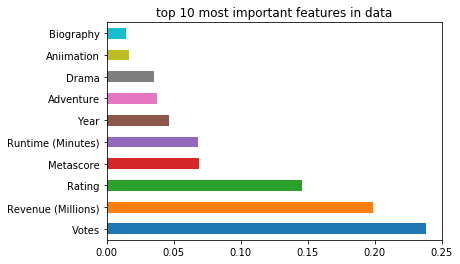

In [3]:
#Data for Evaluation
X = data[data.columns[6:32]]
Y = data.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class 

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("top 10 most important features in data")
plt.show()

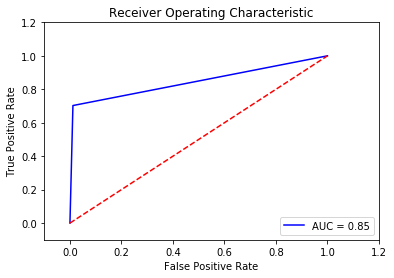

In [4]:
#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

#Model and Training
clf = svm.SVC()
y_pred=clf.fit(X_train,Y_train).predict(x_test)

#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [5]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)

Confusion Matrix is :
[[171   2]
 [ 11  26]]

Accuracy is :
0.9380952380952381

Precision is :
0.9285714285714286

Recall is: 
0.7027027027027027


In [6]:
print("SVM algo dogrulugu:", clf.score(X_test,Y_test))

SVM algo dogrulugu: 0.8238095238095238


### Submission 

In [7]:
submission_predictions = clf.predict(X_test)

In [8]:
submission = pd.DataFrame({
        "Year": x_test["Year"],
        "Success": submission_predictions
    })

submission.to_csv("success3.csv", index=False)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
submission.head()